# Getting Started with Tensorflow/Keras

---



## 1. Image Classification

In [1]:
! pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
tf.__version__

'2.8.2'

In [5]:
tf.keras.__version__

'2.8.0'

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5.
# However, for fashion MNIST, we need the list f class names to know what we are dealing with:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [9]:
# Classification MLP with 2 hidden layers
# Multilabel classfication

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7159 - accuracy: 0.7642 - val_loss: 0.4960 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4847 - accuracy: 0.8306 - val_loss: 0.4985 - val_accuracy: 0.8116
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4418 - accuracy: 0.8454 - val_loss: 0.4304 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4140 - accuracy: 0.8545 - val_loss: 0.4159 - val_accuracy: 0.8546
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3936 - accuracy: 0.8627 - val_loss: 0.3819 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3768 - accuracy: 0.8678 - val_loss: 0.3797 - val_accuracy: 0.8624
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3649 - accuracy: 0.8706 - val_loss: 0.3853 - val_accuracy:

In [11]:
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


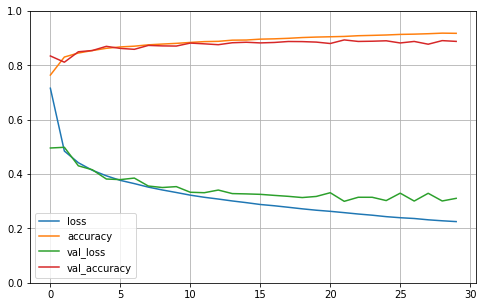

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 72.7610 - accuracy: 0.8360


[72.760986328125, 0.8360000252723694]

## 2. MLP Regression

In [16]:
# from pandas.io.common import file_path_to_url
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="leaky_relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="leaky_relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8125 - val_loss: 0.5558
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5212 - val_loss: 0.4984
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4719
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4609 - val_loss: 0.5098
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4596 - val_loss: 0.4852
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4421 - val_loss: 0.4526
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4287 - val_loss: 0.4348
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4185 - val_loss: 0.4189
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4077 - val_loss: 0.4061
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4048 - val_loss: 0.4092

0.3411481976509094

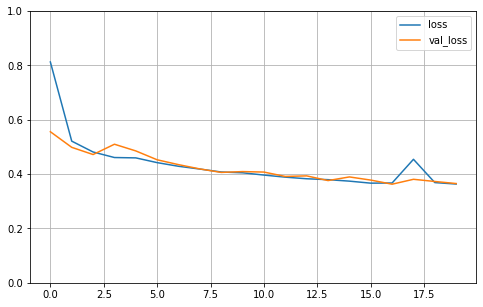

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()